# Jane Street Preliminary

 - Load data
 - EDA

This is based on other people's EDA notebook


In [8]:
import os, sys
import gc
import random
import numpy as np
import pandas as pd
import seaborn as sns
import datatable as dtable
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#import xgboost as xgb

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

#import janestreet

#%matplotlib inline

pd.set_option('display.max_columns', 200)
# To Check environment
# ! conda info --envs

## 1. Load data

In [9]:
# 1. Lod data

ddir='~/learn/kaggle/Data/JaneStreet20' # local
#ddir='../input/jane-street-market-prediction' # kaggle

# using datatable for faster loading
train = dtable.fread(os.path.join(ddir,"train.csv")).to_pandas()
features = pd.read_csv(os.path.join(ddir,"features.csv"))
examples_test = pd.read_csv(os.path.join(ddir,"example_test.csv"))
example_sample_submission = pd.read_csv(os.path.join(ddir,"example_sample_submission.csv"))

# free up space
gc.collect()

38

In [10]:

print("============= Memory Usage =============")
train.memory_usage()

============= Memory Usage =============


Index               128
date            9561964
weight         19123928
resp_1         19123928
resp_2         19123928
                 ...   
feature_126    19123928
feature_127    19123928
feature_128    19123928
feature_129    19123928
ts_id           9561964
Length: 139, dtype: int64

## 2. Descriptive statistics

In [13]:
train.describe() #.style.background_gradient(cmap="gnuplot")

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390043e+06,2.390043e+06,2.390491e+06,2.390491e+06,1.997356e+06,1.997356e+06,2.389703e+06,2.389703e+06,2.310476e+06,2.310476e+06,2.375138e+06,2.375138e+06,2.383808e+06,2.383808e+06,1.994956e+06,1.994956e+06,2.389703e+06,2.389703e+06,2.309047e+06,2.309047e+06,2.375138e+06,2.375138e+06,2.383808e+06,2.383808e+06,1.994956e+06,1.994956e+06,2.389703e+06,2.389703e+06,2.309047e+06,2.309047e+06,2.375138e+06,2.375138e+06,2.383808e+06,2.383808e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390043e+06,2.390043e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.322082e+06,2.389772e+06,2.390491e+06,2.390490e+06,2.390443e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.039065e+06,2.389703e+06,2.326403e+06,2.375138e+06,2.383808e+06,2.390491e+06,2.320637e+06,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04,9.838565e-03,3.855776e-01,3.576875e-01,8.919166e-03,4.150056e-03,-3.714619e-03,-1.258924e-02,5.177655e-02,2.682810e-02,2.488133e-01,1.823485e-01,8.912156e-02,4.948554e-02,1.431054e-01,8.902722e-02,2.116776e-01,1.463007e-01,1.212193e-01,1.135821e-01,2.938148e-01,2.687679e-01,1.869113e-01,1.769786e-01,2.524413e-01,2.385608e-01,2.940708e-01,2.731777e-01,1.354830e-01,1.608763e-01,3.218924e-01,3.425343e-01,2.205604e-01,2.501312e-01,3.082217e-01,3.353533e-01,3.414531e-01,3.658253e-01,2.932047e-02,2.289178e-02,4.002162e-02,5.074973e-02,4.450544e-01,3.601836e-01,3.460287e-01,4.115306e-01,4.380310e-01,4.

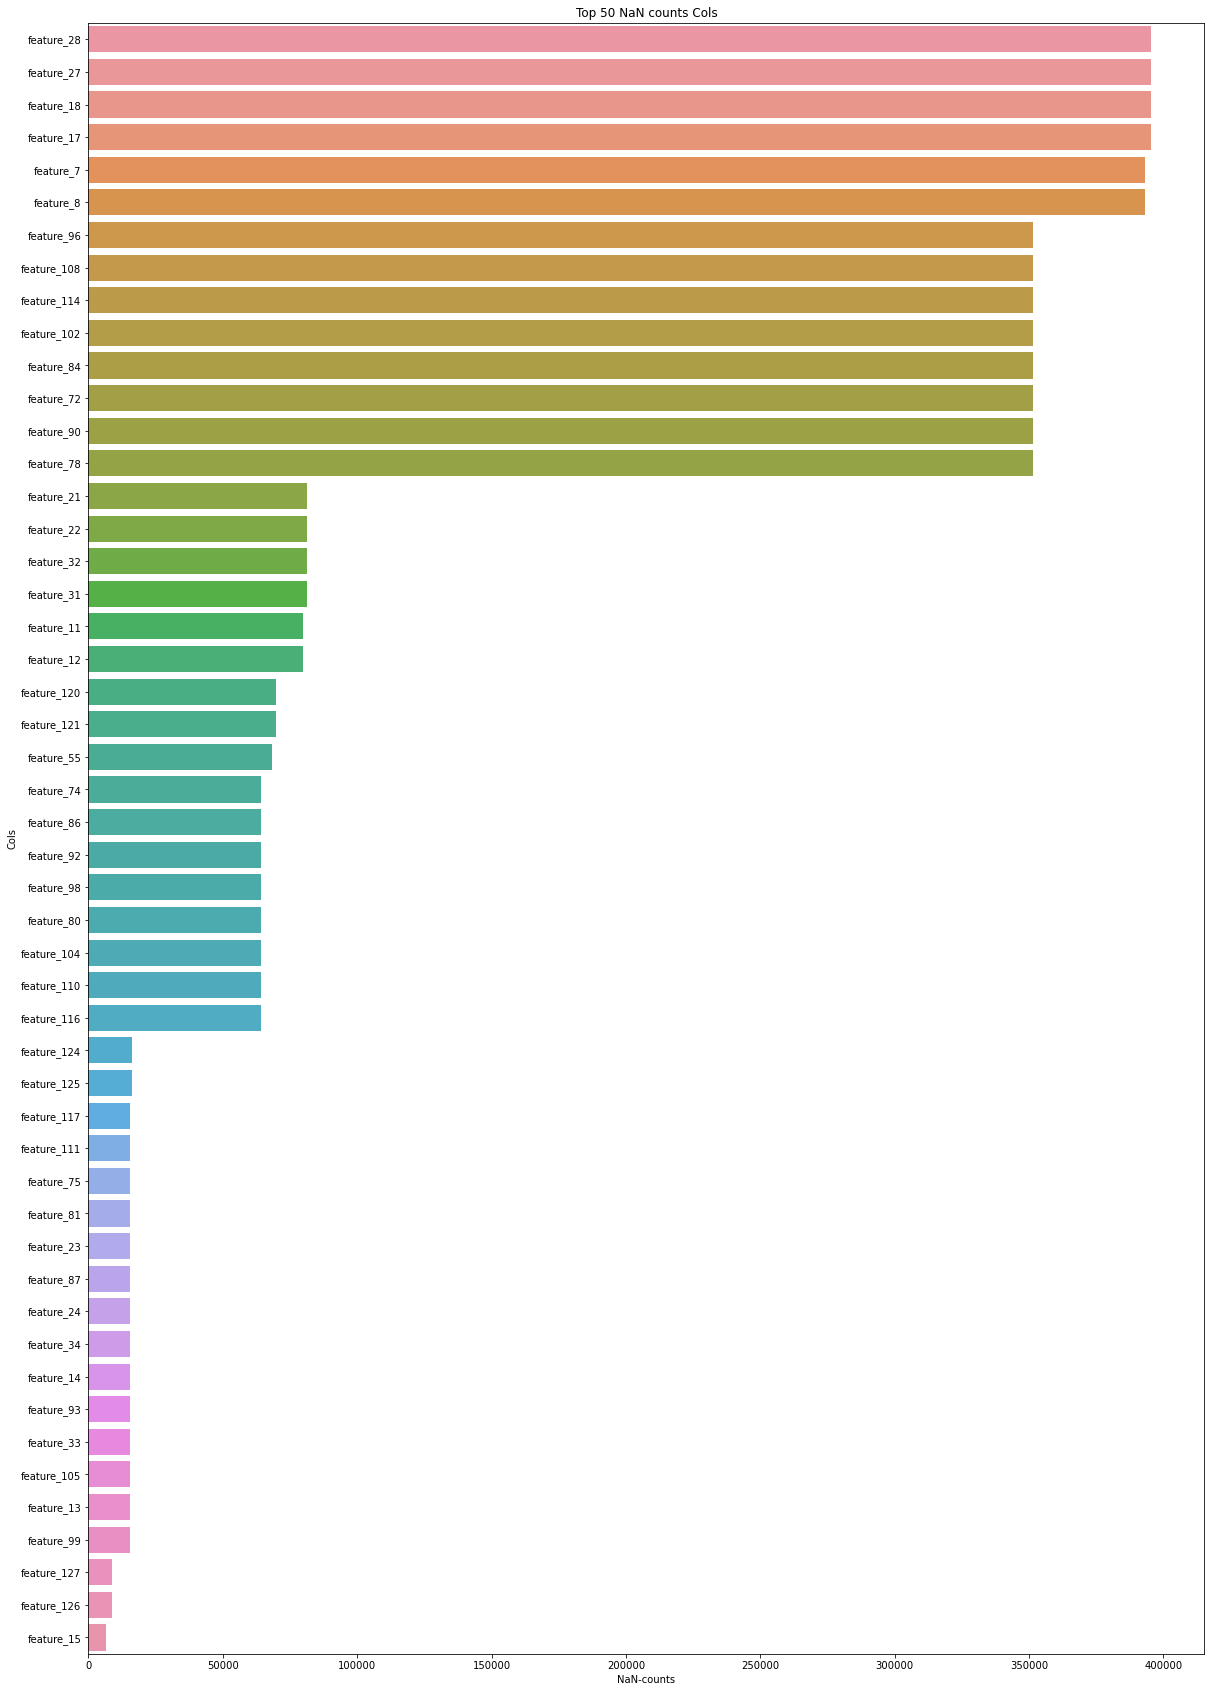

In [16]:
# 2.2 NaN count
nanCount = train.isna().sum().sort_values(ascending=False).to_frame().reset_index()
nanCount.columns = ["Cols", "NaN-counts"]

plt.figure(figsize=(20, 30))
sns.barplot(x='NaN-counts', y='Cols', data=nanCount.head(50), orient="h")
plt.title("Top 50 NaN counts Cols")
plt.show()

In [17]:
# Equal nanCount should be printed on the same row, with all feature names
for k, v in nanCount.groupby("NaN-counts").groups.items():
    print(f"\n{k}: {nanCount.iloc[v, :]}")


0:             Cols  NaN-counts
88     feature_2           0
89          resp           0
90        resp_4           0
91        weight           0
92        resp_2           0
93     feature_0           0
94        resp_3           0
95     feature_6           0
96        resp_1           0
97     feature_5           0
98     feature_1           0
99         ts_id           0
100   feature_61           0
101   feature_37           0
102   feature_63           0
103   feature_65           0
104   feature_66           0
105   feature_67           0
106   feature_68           0
107   feature_69           0
108   feature_70           0
109   feature_71           0
110   feature_77           0
111   feature_83           0
112   feature_89           0
113   feature_95           0
114  feature_101           0
115  feature_107           0
116  feature_113           0
117  feature_119           0
118   feature_64           0
119   feature_62           0
120   feature_38           0
121   feat

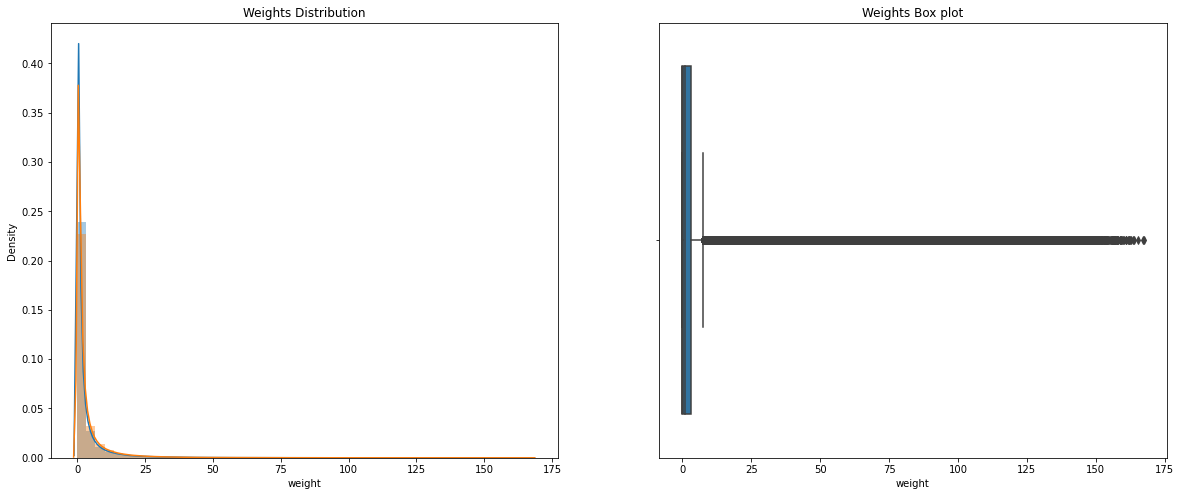

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.distplot(train["weight"], ax=axs[0])
sns.distplot(train.query('weight != 0')["weight"], ax=axs[0])
axs[0].set_title("Weights Distribution")

sns.boxplot(x="weight", data=train[train["weight"]!=0], ax=axs[1])
sns.boxplot(x="weight", data=train[train["weight"]==0], ax=axs[1])
axs[1].set_title("Weights Box plot")

plt.show()

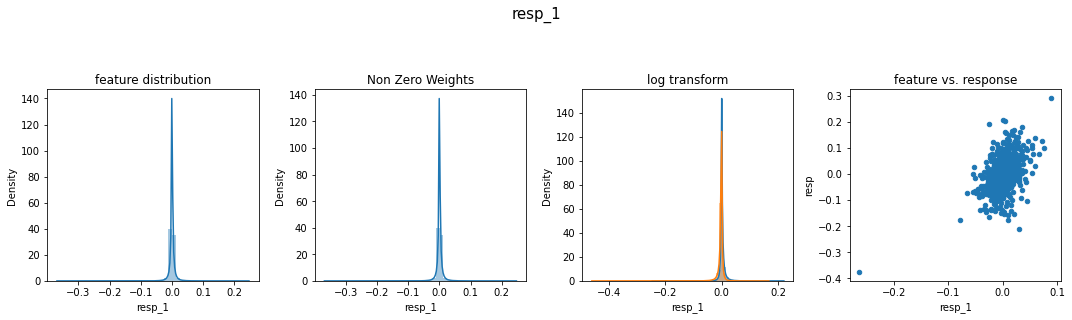

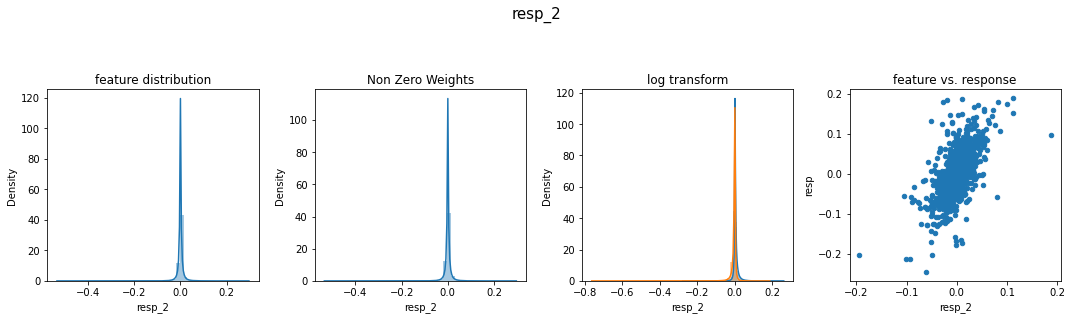

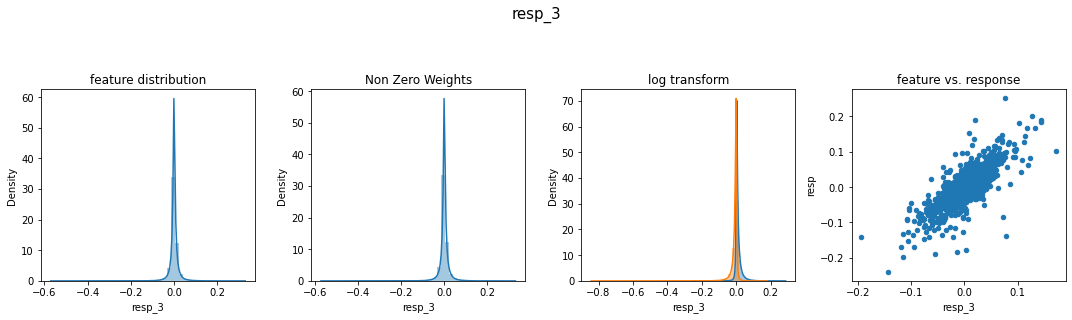

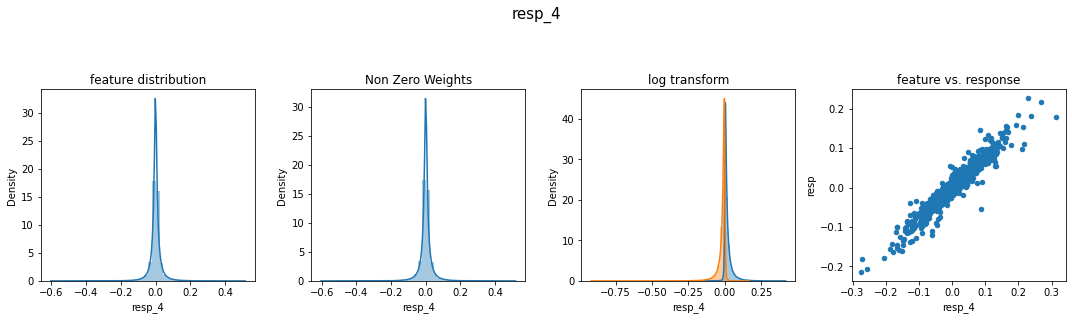

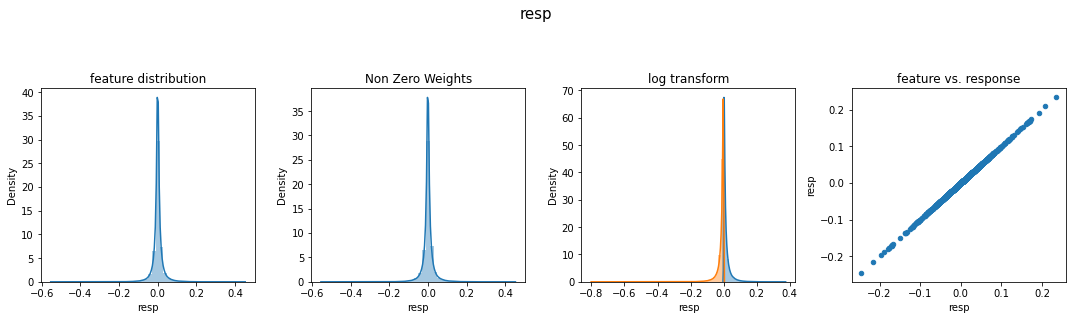

In [20]:
NSW_COLS = [c for c in train.columns if 'resp' in c]
for f in NSW_COLS:
    fig, axs = plt.subplots(1, 4, figsize=(15, 4))
    sns.distplot(train[f], ax=axs[0])
    sns.distplot(train.query('weight != 0')[f], ax=axs[1])
    try:
        sns.distplot(train.query('weight > 0 and resp > 0')[f].dropna().apply(np.log1p), ax=axs[2])
        sns.distplot(train.query('weight > 0 and resp < 0')[f].dropna().apply(np.log1p), ax=axs[2])
    except:
        pass
    train.sample(5000).plot(kind='scatter', x=f, y='resp', ax=axs[3])
    fig.suptitle(f, fontsize=15, y=1.1)
    
    axs[0].set_title('feature distribution')
    axs[1].set_title('Non Zero Weights')
    axs[2].set_title('log transform')
    axs[3].set_title('feature vs. response')
    
    plt.tight_layout()
    plt.show()